In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from  IPython import display
import pathlib
import shutil
import tempfile
import sklearn.metrics

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
raw_dataset = pd.read_csv('/Users/katana/PycharmProjects/RNA-Seq/RNA_HED_met/immunogenic_immuneLandscape.csv')

dataset_orig = raw_dataset.copy()
dataset_orig.head()

,Unnamed: 0,X,ParticipantBarcode,Study,leukocyte_fraction,Subclonal_genome_fraction,Stromal_Fraction,mutationrate_silent_per_Mb,mutationrate_nonsilent_per_Mb,numberOfImmunogenicMutation,...,geom_HLAI_N,geom_HLAII_N,geom_HLAI_upregulation,geom_HLAII_upregulation,geom_high_HLAIupreg,geom_high_HLAIIupreg,geom_high_HLAI,geom_high_HLAII,highCYT,evol
0,8,2481,TCGA-A3-3383,KIRC,0.156970,0.00,0.36,0.412523,1.182565,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
1,9,2514,TCGA-B0-4691,KIRC,0.286511,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
2,10,2515,TCGA-B0-4706,KIRC,0.132438,0.00,0.36,0.246845,1.042234,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,True
3,11,2532,TCGA-BP-4763,KIRC,0.262396,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
4,12,2533,TCGA-BP-5169,KIRC,0.560206,0.91,0.55,0.360657,1.303915,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True


In [4]:
dataset=dataset_orig[['evol', 'Study','tumor_methyl_A_alt', 'tumor_methyl_B_alt', 'tumor_methyl_C_alt', 'normal_methyl_A_alt', 'normal_methyl_B_alt', 'normal_methyl_C_alt']]
df_study = pd.get_dummies(dataset['Study'])
# print(df_study)
dataset = pd.concat([dataset, df_study], axis=1)
dataset.head()

dataset.isna().sum()
dataset = dataset.dropna()
dataset.shape
dataset['evol']=dataset['evol'].astype('uint8')
dataset.Study.unique()

array(['KIRC', 'LUAD', 'UCEC', 'THCA', 'LUSC', 'PRAD', 'HNSC', 'COAD',
       'BLCA', 'LIHC', 'STAD', 'KIRP', 'CESC', 'SARC', 'PCPG', 'PAAD',
       'READ', 'ESCA', 'CHOL', 'BRCA'], dtype=object)

In [69]:
random_state = np.random.RandomState()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=random_state)
    
train_set = dataset.sample(frac=0.6, random_state=random_state)
test_set = dataset.drop(train_set.index)
train_set.pop('Study')
test_set.pop('Study')
train_set.shape

(273, 36)

In [70]:
random_state = np.random.RandomState(42)
frac=0.8      # or 0.4
ACC_df=dataset[dataset['Study']=='ACC']
ACC_train_dataset = ACC_df.sample(frac=frac, random_state=random_state)
ACC_test_dataset = ACC_df.drop(ACC_train_dataset.index)

BLCA_df=dataset[dataset['Study']=='BLCA']
BLCA_train_dataset = BLCA_df.sample(frac=frac, random_state=random_state)
BLCA_test_dataset = BLCA_df.drop(BLCA_train_dataset.index)

BRCA_df=dataset[dataset['Study']=='BRCA']
BRCA_train_dataset = BRCA_df.sample(frac=frac, random_state=random_state)
BRCA_test_dataset = BRCA_df.drop(BRCA_train_dataset.index)

CESC_df=dataset[dataset['Study']=='CESC']
CESC_train_dataset = CESC_df.sample(frac=frac, random_state=random_state)
CESC_test_dataset = CESC_df.drop(CESC_train_dataset.index)

CHOL_df=dataset[dataset['Study']=='CHOL']
CHOL_train_dataset = CHOL_df.sample(frac=frac, random_state=random_state)
CHOL_test_dataset = CHOL_df.drop(CHOL_train_dataset.index)

COAD_df=dataset[dataset['Study']=='COAD']
COAD_train_dataset = COAD_df.sample(frac=frac, random_state=random_state)
COAD_test_dataset = COAD_df.drop(COAD_train_dataset.index)

DLBC_df=dataset[dataset['Study']=='DLBC']
DLBC_train_dataset = DLBC_df.sample(frac=frac, random_state=random_state)
DLBC_test_dataset = DLBC_df.drop(DLBC_train_dataset.index)

ESCA_df=dataset[dataset['Study']=='ESCA']
ESCA_train_dataset = ESCA_df.sample(frac=frac, random_state=random_state)
ESCA_test_dataset = ESCA_df.drop(ESCA_train_dataset.index)

GBM_df=dataset[dataset['Study']=='GBM']
GBM_train_dataset = GBM_df.sample(frac=frac, random_state=random_state)
GBM_test_dataset = GBM_df.drop(GBM_train_dataset.index)

HNSC_df=dataset[dataset['Study']=='HNSC']
HNSC_train_dataset = HNSC_df.sample(frac=frac, random_state=random_state)
HNSC_test_dataset = HNSC_df.drop(HNSC_train_dataset.index)

KICH_df=dataset[dataset['Study']=='KICH']
KICH_train_dataset = KICH_df.sample(frac=frac, random_state=random_state)
KICH_test_dataset = KICH_df.drop(KICH_train_dataset.index)

KIRC_df=dataset[dataset['Study']=='KIRC']
KIRC_train_dataset = KIRC_df.sample(frac=frac, random_state=random_state)
KIRC_test_dataset = KIRC_df.drop(KIRC_train_dataset.index)

KIRP_df=dataset[dataset['Study']=='KIRP']
KIRP_train_dataset = KIRP_df.sample(frac=frac, random_state=random_state)
KIRP_test_dataset = KIRP_df.drop(KIRP_train_dataset.index)

LGG_df=dataset[dataset['Study']=='LGG']
LGG_train_dataset = LGG_df.sample(frac=frac, random_state=random_state)
LGG_test_dataset = LGG_df.drop(LGG_train_dataset.index)

LIHC_df=dataset[dataset['Study']=='LIHC']
LIHC_train_dataset = LIHC_df.sample(frac=frac, random_state=random_state)
LIHC_test_dataset = LIHC_df.drop(LIHC_train_dataset.index)

LUAD_df=dataset[dataset['Study']=='LUAD']
LUAD_train_dataset = LUAD_df.sample(frac=frac, random_state=random_state)
LUAD_test_dataset = LUAD_df.drop(LUAD_train_dataset.index)

LUSC_df=dataset[dataset['Study']=='LUSC']
LUSC_train_dataset = LUSC_df.sample(frac=frac, random_state=random_state)
LUSC_test_dataset = LUSC_df.drop(LUSC_train_dataset.index)

MESO_df=dataset[dataset['Study']=='MESO']
MESO_train_dataset = MESO_df.sample(frac=frac, random_state=random_state)
MESO_test_dataset = MESO_df.drop(MESO_train_dataset.index)

OV_df=dataset[dataset['Study']=='OV']
OV_train_dataset = OV_df.sample(frac=frac, random_state=random_state)
OV_test_dataset = OV_df.drop(OV_train_dataset.index)

PAAD_df=dataset[dataset['Study']=='PAAD']
PAAD_train_dataset = PAAD_df.sample(frac=frac, random_state=random_state)
PAAD_test_dataset = PAAD_df.drop(PAAD_train_dataset.index)

PCPG_df=dataset[dataset['Study']=='PCPG']
PCPG_train_dataset = PCPG_df.sample(frac=frac, random_state=random_state)
PCPG_test_dataset = PCPG_df.drop(PCPG_train_dataset.index)

PRAD_df=dataset[dataset['Study']=='PRAD']
PRAD_train_dataset = PRAD_df.sample(frac=frac, random_state=random_state)
PRAD_test_dataset = PRAD_df.drop(PRAD_train_dataset.index)


READ_df=dataset[dataset['Study']=='READ']
READ_train_dataset = READ_df.sample(frac=frac, random_state=random_state)
READ_test_dataset = READ_df.drop(READ_train_dataset.index)

SARC_df=dataset[dataset['Study']=='SARC']
SARC_train_dataset = SARC_df.sample(frac=frac, random_state=random_state)
SARC_test_dataset = SARC_df.drop(SARC_train_dataset.index)

SKCM_df=dataset[dataset['Study']=='SKCM']
SKCM_train_dataset = SKCM_df.sample(frac=frac, random_state=random_state)
SKCM_test_dataset = SKCM_df.drop(SKCM_train_dataset.index)

STAD_df=dataset[dataset['Study']=='STAD']
STAD_train_dataset = STAD_df.sample(frac=frac, random_state=random_state)
STAD_test_dataset = STAD_df.drop(STAD_train_dataset.index)

TGCT_df=dataset[dataset['Study']=='TGCT']
TGCT_train_dataset = TGCT_df.sample(frac=frac, random_state=random_state)
TGCT_test_dataset = TGCT_df.drop(TGCT_train_dataset.index)

THCA_df=dataset[dataset['Study']=='THCA']
THCA_train_dataset = THCA_df.sample(frac=frac, random_state=random_state)
THCA_test_dataset = THCA_df.drop(THCA_train_dataset.index)

THYM_df=dataset[dataset['Study']=='THYM']
THYM_train_dataset = THYM_df.sample(frac=frac, random_state=random_state)
THYM_test_dataset = THYM_df.drop(THYM_train_dataset.index)

UCEC_df=dataset[dataset['Study']=='UCEC']
UCEC_train_dataset = UCEC_df.sample(frac=frac, random_state=random_state)
UCEC_test_dataset = UCEC_df.drop(UCEC_train_dataset.index)

UCS_df=dataset[dataset['Study']=='UCS']
UCS_train_dataset = UCS_df.sample(frac=frac, random_state=random_state)
UCS_test_dataset = UCS_df.drop(UCS_train_dataset.index)

UVM_df=dataset[dataset['Study']=='UVM']
UVM_train_dataset = UVM_df.sample(frac=frac, random_state=random_state)
UVM_test_dataset = UVM_df.drop(UVM_train_dataset.index)

train_frames=[ACC_train_dataset,BLCA_train_dataset,BRCA_train_dataset,CESC_train_dataset,CHOL_train_dataset,COAD_train_dataset,DLBC_train_dataset,ESCA_train_dataset,GBM_train_dataset,HNSC_train_dataset,KICH_train_dataset,KIRC_train_dataset,KIRP_train_dataset,LGG_train_dataset,LIHC_train_dataset,LUAD_train_dataset,LUSC_train_dataset,MESO_train_dataset,OV_train_dataset,PAAD_train_dataset,PCPG_train_dataset,PRAD_train_dataset,READ_train_dataset,SARC_train_dataset,SKCM_train_dataset,STAD_train_dataset,TGCT_train_dataset,THCA_train_dataset,THYM_train_dataset,UCEC_train_dataset,UCS_train_dataset,UVM_train_dataset]
train_set=pd.concat(train_frames)
test_frames=[ACC_test_dataset,BLCA_test_dataset,BRCA_test_dataset,CESC_test_dataset,CHOL_test_dataset,COAD_test_dataset,DLBC_test_dataset,ESCA_test_dataset,GBM_test_dataset,HNSC_test_dataset,KICH_test_dataset,KIRC_test_dataset,KIRP_test_dataset,LGG_test_dataset,LIHC_test_dataset,LUAD_test_dataset,LUSC_test_dataset,MESO_test_dataset,OV_test_dataset,PAAD_test_dataset,PCPG_test_dataset,PRAD_test_dataset,READ_test_dataset,SARC_test_dataset,SKCM_test_dataset,STAD_test_dataset,TGCT_test_dataset,THCA_test_dataset,THYM_test_dataset,UCEC_test_dataset,UCS_test_dataset,UVM_test_dataset]
test_set=pd.concat(test_frames)

# exclude Study which is categorical
dataset.pop('Study')


1       KIRC
2       KIRC
4       KIRC
6       KIRC
8       KIRC
        ... 
4932    BRCA
4942    BRCA
4960    BRCA
4969    BRCA
4983    BRCA
Name: Study, Length: 455, dtype: object

In [71]:
# exclude Study which is categorical
train_set.pop('Study')
test_set.pop('Study')
train_set.shape

(365, 36)

In [72]:
train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('evol')
test_labels = test_features.pop('evol')

In [73]:
feature_names=list(train_features.columns)

In [74]:
X_train=pd.DataFrame.to_numpy(train_features)
y_train=pd.Series.to_numpy(train_labels)

X_test=pd.DataFrame.to_numpy(test_features)
y_test=pd.Series.to_numpy(test_labels)

In [75]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8111111111111111

In [76]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train).score(X_test, y_test)

/Users/katana/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8666666666666667

In [110]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train).score(X_test, y_test)
pred=clf.fit(X_train, y_train).predict_proba(X_test)

In [78]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8555555555555555

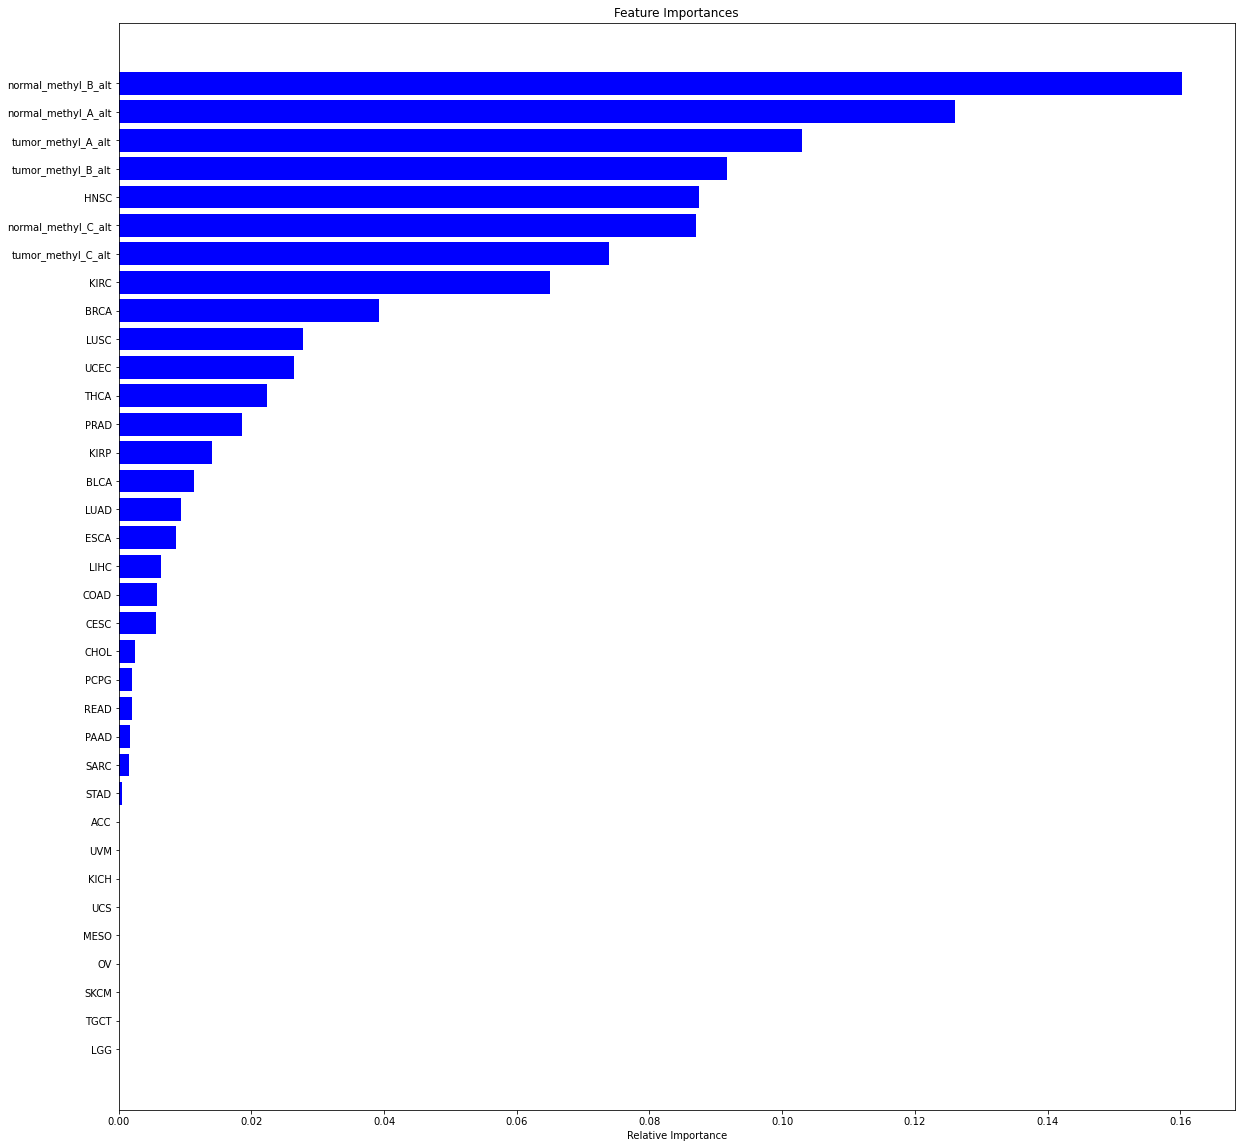

In [79]:
# Random forest generate feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)
fig=figure(figsize=(20,20))

title('Feature Importances')
barh(range(len(indices)), importances[indices], color='b', align='center')
yticks(range(len(indices)), np.array(feature_names)[np.argsort(importances)])
xlabel('Relative Importance');


fig.savefig('plot.png')

In [80]:
sum(y_test == 1) / y_test.size

0.3333333333333333

In [81]:
clf = GaussianNB()
clf.fit(X_train, y_train).score(X_test, y_test)

0.8666666666666667

In [84]:
clf = LogisticRegression(solver="liblinear", random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8888888888888888

In [94]:
clf = LogisticRegression(solver="liblinear", random_state=0)
pred=clf.fit(X_train, y_train).predict_proba(X_test)

In [100]:
pred[:,1]

array([0.69 , 0.714, 0.59 , 0.626, 0.616, 0.624, 0.647, 0.64 , 0.644,
       0.623, 0.619, 0.613, 0.62 , 0.219, 0.669, 0.775, 0.912, 0.894,
       0.909, 0.895, 0.902, 0.913, 0.916, 0.077, 0.069, 0.077, 0.075,
       0.071, 0.075, 0.077, 0.07 , 0.075, 0.076, 0.065, 0.065, 0.071,
       0.071, 0.065, 0.074, 0.071, 0.072, 0.076, 0.072, 0.072, 0.073,
       0.076, 0.074, 0.076, 0.077, 0.066, 0.069, 0.072, 0.077, 0.081,
       0.081, 0.086, 0.083, 0.076, 0.073, 0.209, 0.201, 0.196, 0.204,
       0.198, 0.412, 0.402, 0.883, 0.881, 0.884, 0.877, 0.072, 0.072,
       0.069, 0.066, 0.07 , 0.077, 0.083, 0.105, 0.12 , 0.106, 0.101,
       0.112, 0.097, 0.111, 0.111, 0.109, 0.113, 0.105, 0.705, 0.736])

In [111]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
roc_auc = auc(fpr, tpr)

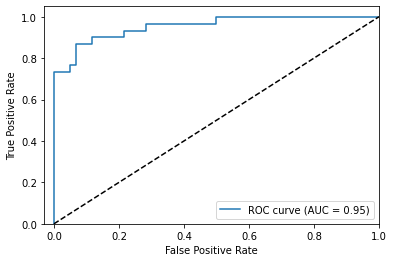

In [124]:
fig=plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fig.savefig('evol.png')

<Figure size 432x288 with 0 Axes>

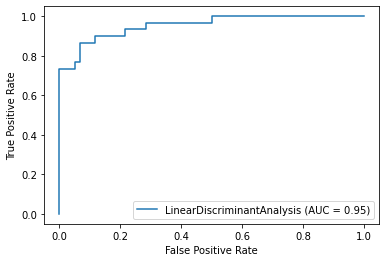

<Figure size 432x288 with 0 Axes>

In [115]:
# LDA
fig=plt.figure()
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  


In [18]:
predictions=clf.fit(X_train, y_train).predict_proba(X_test)

pred = -1 * np.ones(len(y_test))
for i in range(len(y_test)):
    pred[i] = predictions[i][y_test[i]]
sum(pred < 0.5)

7

In [19]:
clf.predict_proba(X_test)[:, 1]

array([0.398, 0.964, 0.978, 0.996, 0.853, 0.772, 0.913, 0.693, 1.   ,
       0.617, 0.672, 0.654, 0.485, 0.432, 0.978, 0.486, 0.742, 0.511,
       0.971, 0.985, 0.995, 0.988, 0.984, 0.987, 0.026, 0.013, 0.046,
       0.848, 0.008, 0.   , 0.011, 0.   , 0.058, 0.023, 0.005, 0.003,
       0.004, 0.017, 0.02 , 0.036, 0.019, 0.399, 0.015, 0.001, 0.182,
       0.06 , 0.049, 0.815, 0.109, 0.69 , 0.275, 0.468, 0.085, 0.021,
       0.915, 0.738, 0.996, 0.046, 0.032, 0.027, 0.02 , 0.021, 0.019,
       0.073, 0.965, 0.61 , 0.764, 0.009, 0.009, 0.024, 0.031, 0.03 ,
       0.182, 0.016, 0.04 , 0.104, 0.046, 0.168, 0.874])

In [20]:
clf.predict_proba(X_test)

array([[0.602, 0.398],
       [0.036, 0.964],
       [0.022, 0.978],
       [0.004, 0.996],
       [0.147, 0.853],
       [0.228, 0.772],
       [0.087, 0.913],
       [0.307, 0.693],
       [0.   , 1.   ],
       [0.383, 0.617],
       [0.328, 0.672],
       [0.346, 0.654],
       [0.515, 0.485],
       [0.568, 0.432],
       [0.022, 0.978],
       [0.514, 0.486],
       [0.258, 0.742],
       [0.489, 0.511],
       [0.029, 0.971],
       [0.015, 0.985],
       [0.005, 0.995],
       [0.012, 0.988],
       [0.016, 0.984],
       [0.013, 0.987],
       [0.974, 0.026],
       [0.987, 0.013],
       [0.954, 0.046],
       [0.152, 0.848],
       [0.992, 0.008],
       [1.   , 0.   ],
       [0.989, 0.011],
       [1.   , 0.   ],
       [0.942, 0.058],
       [0.977, 0.023],
       [0.995, 0.005],
       [0.997, 0.003],
       [0.996, 0.004],
       [0.983, 0.017],
       [0.98 , 0.02 ],
       [0.964, 0.036],
       [0.981, 0.019],
       [0.601, 0.399],
       [0.985, 0.015],
       [0.9

In [21]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9406896551724139

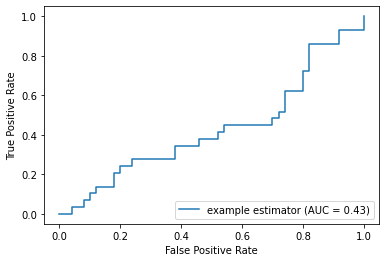

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()   

In [23]:
ns_probs = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = sklearn.metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = sklearn.metrics.roc_curve(y_test, prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

ns_auc = sklearn.metrics.roc_auc_score(y_test, ns_probs)
lr_auc = sklearn.metrics.roc_auc_score(y_test, prob)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

NameError: name 'prob' is not defined

In [ ]:
y_test

In [ ]:
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train).predict(X_test)

In [ ]:
# overfitting
test_loss, test_acc = model.evaluate(test_features_arr,  test_labels_arr, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_features_arr)

In [ ]:
predictions[0][0]

In [ ]:
test_labels_arr[0]

In [ ]:
prob = -1 * np.ones(len(test_labels_arr))
for i in range(len(test_labels_arr)):
    prob[i] = predictions[i][test_labels_arr[i]]
prob

In [ ]:
tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, label_weights=None
)

In [ ]:
ns_probs = [0 for _ in range(len(test_labels_arr))]

ns_fpr, ns_tpr, _ = sklearn.metrics.roc_curve(test_labels_arr, ns_probs)
lr_fpr, lr_tpr, _ = sklearn.metrics.roc_curve(test_labels_arr, prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

ns_auc = sklearn.metrics.roc_auc_score(test_labels_arr, ns_probs)
lr_auc = sklearn.metrics.roc_auc_score(test_labels_arr, prob)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))